In [1]:
import requests
import pandas as pd
import numpy as np
import pprint
import matplotlib.pyplot as plt

In [2]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
response = requests.get(url)
json = response.json()

In [44]:
matches_url = 'https://api.football-data.org/v2/competitions/PL/matches'
teams_url = 'https://api.football-data.org/v2/competitions/PL/teams'
fixtures_response = requests.get(matches_url,headers={'X-Auth-Token': '3344f6dea3c44934a3a7c7eb185352de'})
teams_response = requests.get(teams_url, headers={'X-Auth-Token': '3344f6dea3c44934a3a7c7eb185352de'} )
matches_json = fixtures_response.json()
teams_json = teams_response.json()
fixture_dict = dict()
pp = pprint.PrettyPrinter(indent=4)
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])
useful_elements_df = elements_df[['second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points']]
useful_elements_df['position'] = useful_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)
useful_elements_df['team'] = useful_elements_df.team.map(teams_df.set_index('id').name)
useful_elements_df['value'] = useful_elements_df.value_season.astype(float)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [73]:
difficulty_dict = dict()
custom_difficulty_dict = dict()
for i, index in enumerate(teams_df["name"]):
    difficulty_dict[index] = teams_df["strength"][i]
    custom_difficulty_dict[index] = difficulty_dict[index] * 2
pp.pprint(custom_difficulty_dict)

{   u'Arsenal': 8,
    u'Aston Villa': 6,
    u'Brentford': 4,
    u'Brighton': 6,
    u'Burnley': 4,
    u'Chelsea': 8,
    u'Crystal Palace': 6,
    u'Everton': 6,
    u'Leeds': 6,
    u'Leicester': 8,
    u'Liverpool': 8,
    u'Man City': 10,
    u'Man Utd': 8,
    u'Newcastle': 4,
    u'Norwich': 4,
    u'Southampton': 6,
    u'Spurs': 8,
    u'Watford': 4,
    u'West Ham': 8,
    u'Wolves': 6}


In [46]:
for i in teams_json["teams"]:
    away_teams = []
    for j in matches_json["matches"]:
        if(i["name"]==j["homeTeam"]["name"]):
            away_teams.append(j["awayTeam"]["name"])
        elif(i["name"]==j["awayTeam"]["name"]):
            away_teams.append(j["homeTeam"]["name"])
    fixture_dict[i["name"]] = away_teams

api_team_names = []
for i in fixture_dict:
    api_team_names.append(i)


In [47]:
def fpl_to_api_name(name):
    outliers = { 
        "Wolves":"Wolverhampton Wanderers FC",
        "Man Utd" : "Manchester United FC",
        "Man City" : "Manchester City FC",
        "Spurs": "Tottenham Hotspur FC",
        "Sheffield Utd": "Sheffield United FC"

    }
    for i in api_team_names:
        if(name in i):
            return i
    return[outliers[name]]

def api_name_to_fpl(name):
    outliers = { 
        "Wolverhampton Wanderers FC":"Wolves",
        "Manchester United FC":"Man Utd",
        "Manchester City FC": "Man City",
        "Tottenham Hotspur FC": "Spurs",
        "Sheffield United FC":"Sheffield Utd"
        
    }
    for i in teams_df["name"]:
        if(i in name):
            return i
        
    return outliers[name]

In [107]:
def fpl_name_difficulty(name):
    return custom_difficulty_dict[name]

def api_name_difficulty(name, difficulty_dict):
    return difficulty_dict[api_name_to_fpl(name)]

def map_difficulty_to_games(list_games, difficulty_dict):
    difficulty_tuples=[]
    for i in list_games:
        difficulty_tuples.append(((i,api_name_difficulty(i, difficulty_dict))))
    return difficulty_tuples


In [108]:
def get_fixture_difficulty_dict(api_team_names, fixture_dict, difficulty_dict):
    fixture_difficulty_dict = {}
    for i in api_team_names:
        for j in fixture_dict[i]:
            fixture_difficulty_dict[i] = map_difficulty_to_games(fixture_dict[i], difficulty_dict)
            
    return fixture_difficulty_dict

pp.pprint(get_fixture_difficulty_dict(api_team_names, fixture_dict, custom_difficulty_dict))

{   u'Arsenal FC': [   (u'Brentford FC', 4),
                       (u'Chelsea FC', 8),
                       (u'Manchester City FC', 10),
                       (u'Norwich City FC', 4),
                       (u'Burnley FC', 4),
                       (u'Tottenham Hotspur FC', 8),
                       (u'Brighton & Hove Albion FC', 6),
                       (u'Crystal Palace FC', 6),
                       (u'Aston Villa FC', 6),
                       (u'Leicester City FC', 8),
                       (u'Watford FC', 4),
                       (u'Liverpool FC', 8),
                       (u'Newcastle United FC', 4),
                       (u'Manchester United FC', 8),
                       (u'Everton FC', 6),
                       (u'Southampton FC', 6),
                       (u'West Ham United FC', 8),
                       (u'Leeds United FC', 6),
                       (u'Norwich City FC', 4),
                       (u'Wolverhampton Wanderers FC', 6),
                      

                              (u'Everton FC', 6),
                              (u'Leeds United FC', 6),
                              (u'Southampton FC', 6),
                              (u'Watford FC', 4),
                              (u'Aston Villa FC', 6),
                              (u'Manchester United FC', 8)],
    u'Everton FC': [   (u'Southampton FC', 6),
                       (u'Leeds United FC', 6),
                       (u'Brighton & Hove Albion FC', 6),
                       (u'Burnley FC', 4),
                       (u'Aston Villa FC', 6),
                       (u'Norwich City FC', 4),
                       (u'Manchester United FC', 8),
                       (u'West Ham United FC', 8),
                       (u'Watford FC', 4),
                       (u'Wolverhampton Wanderers FC', 6),
                       (u'Tottenham Hotspur FC', 8),
                       (u'Manchester City FC', 10),
                       (u'Brentford FC', 4),
                       (u'Liv

                                 (u'Crystal Palace FC', 6)],
    u'Newcastle United FC': [   (u'West Ham United FC', 8),
                                (u'Aston Villa FC', 6),
                                (u'Southampton FC', 6),
                                (u'Manchester United FC', 8),
                                (u'Leeds United FC', 6),
                                (u'Watford FC', 4),
                                (u'Wolverhampton Wanderers FC', 6),
                                (u'Tottenham Hotspur FC', 8),
                                (u'Crystal Palace FC', 6),
                                (u'Chelsea FC', 8),
                                (u'Brighton & Hove Albion FC', 6),
                                (u'Brentford FC', 4),
                                (u'Arsenal FC', 8),
                                (u'Norwich City FC', 4),
                                (u'Burnley FC', 4),
                                (u'Leicester City FC', 8),
              

                       (u'Norwich City FC', 4),
                       (u'West Ham United FC', 8),
                       (u'Brighton & Hove Albion FC', 6),
                       (u'Aston Villa FC', 6),
                       (u'Manchester United FC', 8),
                       (u'Arsenal FC', 8),
                       (u'Southampton FC', 6),
                       (u'Everton FC', 6),
                       (u'Liverpool FC', 8),
                       (u'Leeds United FC', 6),
                       (u'Brentford FC', 4),
                       (u'Manchester City FC', 10),
                       (u'Burnley FC', 4),
                       (u'Crystal Palace FC', 6),
                       (u'Leicester City FC', 8),
                       (u'Chelsea FC', 8)],
    u'West Ham United FC': [   (u'Newcastle United FC', 4),
                               (u'Leicester City FC', 8),
                               (u'Crystal Palace FC', 6),
                               (u'Southampton FC', 6),
  

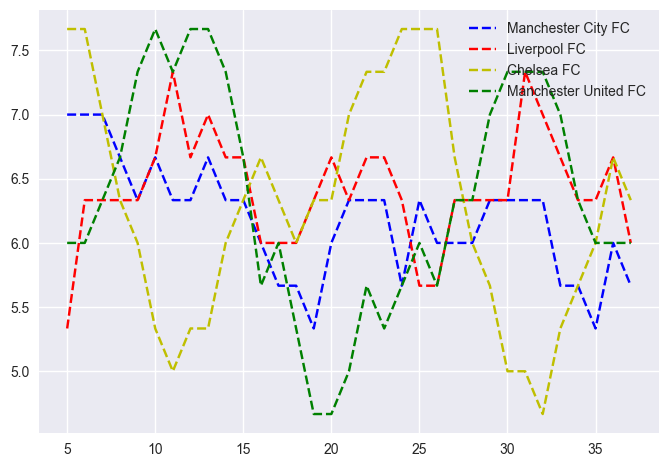

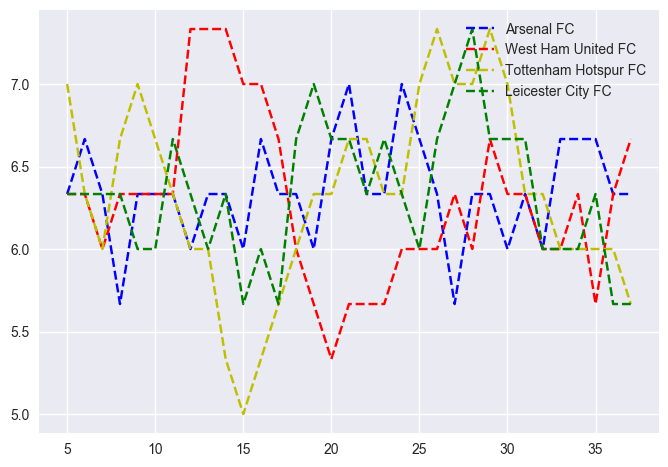

In [90]:
def plot_comparison_graph(club1, club2, club3, club4, difficulty_dict):
    rolling_gw = 6
    fixture_list_club1 = difficulty_dict[club1]
    fixture_list_club2 = difficulty_dict[club2]
    fixture_list_club3 = difficulty_dict[club3]
    fixture_list_club4 = difficulty_dict[club4]
    
    vals1 = [x for (i,x) in fixture_list_club1]
    vals2 = [x for (i,x) in fixture_list_club2]
    vals3 = [x for (i,x) in fixture_list_club3]
    vals4 = [x for (i,x) in fixture_list_club4]
    
    rm_vals1 = pd.Series(np.array(vals1)).rolling(rolling_gw).mean()
    rm_vals2 = pd.Series(np.array(vals2)).rolling(rolling_gw).mean()
    rm_vals3 = pd.Series(np.array(vals3)).rolling(rolling_gw).mean()
    rm_vals4 = pd.Series(np.array(vals4)).rolling(rolling_gw).mean()
    
    plt.style.use('seaborn')
    plt.plot(list(range(0, 38)), rm_vals1, 'b--')
    plt.plot(list(range(0, 38)), rm_vals2, 'r--')
    plt.plot(list(range(0, 38)), rm_vals3, 'y--')
    plt.plot(list(range(0, 38)), rm_vals4, 'g--')
    
    plt.legend([club1, club2, club3, club4], loc='upper right')
    plt.show()


plot_comparison_graph("Manchester City FC", "Liverpool FC", "Chelsea FC", "Manchester United FC", fixture_difficulty_dict)
plot_comparison_graph("Arsenal FC", "West Ham United FC", "Tottenham Hotspur FC", "Leicester City FC", fixture_difficulty_dict)

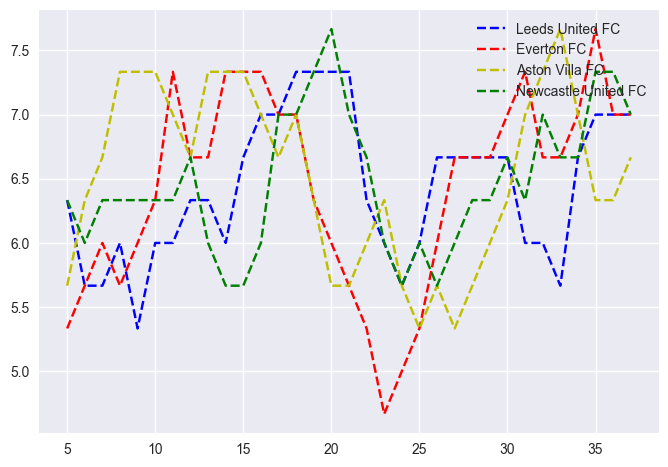

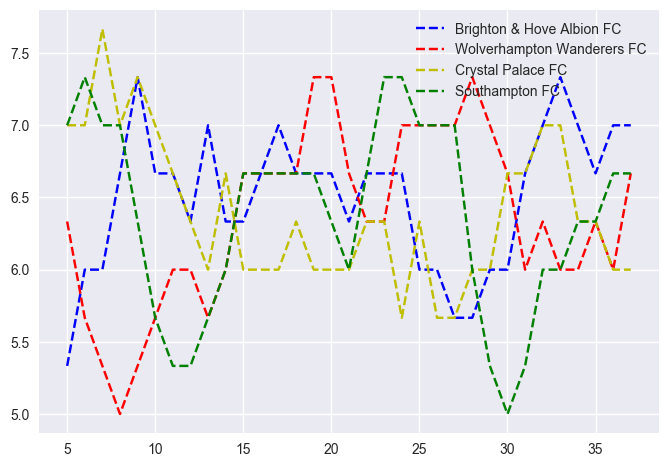

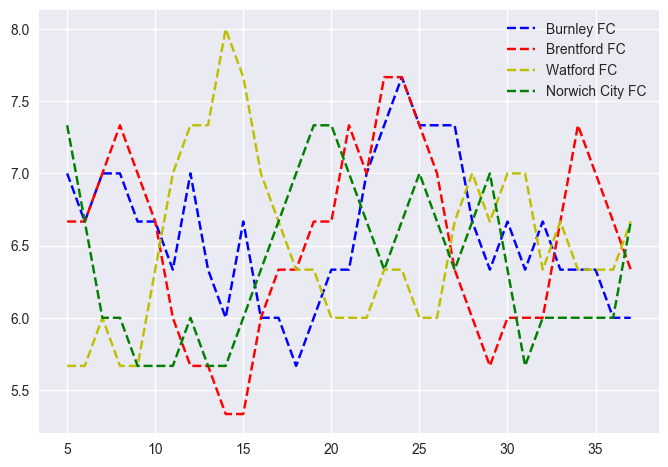

In [91]:
plot_comparison_graph("Leeds United FC", "Everton FC", "Aston Villa FC", "Newcastle United FC", fixture_difficulty_dict)
plot_comparison_graph("Brighton & Hove Albion FC", "Wolverhampton Wanderers FC", "Crystal Palace FC", "Southampton FC", fixture_difficulty_dict)
plot_comparison_graph("Burnley FC", "Brentford FC", "Watford FC", "Norwich City FC", fixture_difficulty_dict)

In [12]:
# Custom Fixture difficulty ratings (FDRs)
# FDR(team) = xGD(team)
# xGD gotten form fbref, have to manually enter in values https://fbref.com/en/comps/9/Premier-League-Stats

In [109]:
test = {
    "Manchester City FC": 42,
    "Chelsea FC" : 31.2,
    "Liverpool FC" : 27.3,
    "Manchester United FC": 18,
    "Brighton1 FC" : 3.9,
    "Arsenal FC" : 9.2,
    "Leicester City FC": 8.3,
    "West Ham FC": 5.6,
    "Tottenham FC" : 5,
    "Aston Villa FC": 0.1,
    "Everton FC" : -4.8,
    "Leeds United FC": -5.4,
    "Wolves FC" : -6,
    "Fulham FC" : -11.7,
    "Southampton FC" : -11.8,
    "Newcastle Utd FC": -13,
    "Burnley FC" : -17.7,
    "Crystal Palace FC": -25,
    "Sheffield Utd FC": -31,
    "West Brom FC": -34
}

pp.pprint(get_fixture_difficulty_dict(api_team_names, fixture_dict, test))

KeyError: 'Man City'

In [ ]:
# BASIC SECTION
# Sort tables based on desired columns

In [13]:
useful_elements_df.sort_values('value',ascending=False).head(20)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
32,Martínez,Aston Villa,1,39.1,55,3420,0,33.8,186,Goalkeeper,33.8
226,Dallas,Leeds,3,17.3,55,3410,0,31.1,171,Midfielder,31.1
237,Meslier,Leeds,1,5.4,50,3150,0,30.8,154,Goalkeeper,30.8
450,Cresswell,West Ham,2,19.1,55,3170,0,27.8,153,Defender,27.8
153,Guaita,Crystal Palace,1,6.0,45,3330,0,27.6,124,Goalkeeper,27.6
41,Targett,Aston Villa,2,9.4,50,3404,0,27.6,138,Defender,27.6
384,Lloris,Spurs,1,4.4,55,3420,0,27.1,149,Goalkeeper,27.1
277,Santana de Moraes,Man City,1,9.7,60,3240,0,26.7,160,Goalkeeper,26.7
238,Harrison,Leeds,3,5.6,60,2846,0,26.7,160,Midfielder,26.7
447,Fabianski,West Ham,1,2.6,50,3150,0,26.6,133,Goalkeeper,26.6


In [14]:
fwd_df = useful_elements_df.loc[useful_elements_df.position == 'Forward']
mid_df = useful_elements_df.loc[useful_elements_df.position == 'Midfielder']
def_df = useful_elements_df.loc[useful_elements_df.position == 'Defender']
goal_df = useful_elements_df.loc[useful_elements_df.position == 'Goalkeeper']

In [15]:
goal_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
32,Martínez,Aston Villa,1,39.1,55,3420,0,33.8,186,Goalkeeper,33.8
237,Meslier,Leeds,1,5.4,50,3150,0,30.8,154,Goalkeeper,30.8
153,Guaita,Crystal Palace,1,6.0,45,3330,0,27.6,124,Goalkeeper,27.6
384,Lloris,Spurs,1,4.4,55,3420,0,27.1,149,Goalkeeper,27.1
277,Santana de Moraes,Man City,1,9.7,60,3240,0,26.7,160,Goalkeeper,26.7
447,Fabianski,West Ham,1,2.6,50,3150,0,26.6,133,Goalkeeper,26.6
467,dos Santos Patrício,Wolves,1,0.3,50,3330,0,26.4,132,Goalkeeper,26.4
0,Leno,Arsenal,1,2.3,50,3131,0,26.2,131,Goalkeeper,26.2
118,Pope,Burnley,1,5.5,55,2880,0,26.2,144,Goalkeeper,26.2
196,Schmeichel,Leicester,1,13.5,50,3420,0,25.6,128,Goalkeeper,25.6


In [30]:
def_df.sort_values('value',ascending=False).head(30)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
450,Cresswell,West Ham,2,19.1,55,3170,0,27.8,153,Defender,27.8
41,Targett,Aston Villa,2,9.4,50,3404,0,27.6,138,Defender,27.6
308,Wan-Bissaka,Man Utd,2,11.4,55,3060,0,26.2,144,Defender,26.2
85,Dunk,Brighton,2,6.5,50,2932,0,26.0,130,Defender,26.0
457,Coufal,West Ham,2,15.3,50,3054,0,25.6,128,Defender,25.6
40,Mings,Aston Villa,2,7.5,50,3194,0,25.6,128,Defender,25.6
180,Keane,Everton,2,3.0,50,2989,0,25.4,127,Defender,25.4
47,Konsa Ngoyo,Aston Villa,2,1.2,50,3195,0,23.8,119,Defender,23.8
282,Gato Alves Dias,Man City,2,26.7,60,2843,0,23.7,142,Defender,23.7
469,Coady,Wolves,2,7.9,45,3303,0,23.6,106,Defender,23.6


In [17]:
def_df.sort_values('total_points',ascending=False).head(30)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
254,Robertson,Liverpool,2,13.3,70,3384,0,23.0,161,Defender,23.0
257,Alexander-Arnold,Liverpool,2,28.1,75,3029,0,21.3,160,Defender,21.3
450,Cresswell,West Ham,2,19.1,55,3170,0,27.8,153,Defender,27.8
308,Wan-Bissaka,Man Utd,2,11.4,55,3060,0,26.2,144,Defender,26.2
282,Gato Alves Dias,Man City,2,26.7,60,2843,0,23.7,142,Defender,23.7
143,Chilwell,Chelsea,2,13.1,60,2286,0,23.2,139,Defender,23.2
276,Cancelo,Man City,2,7.6,60,2298,0,23.0,138,Defender,23.0
41,Targett,Aston Villa,2,9.4,50,3404,0,27.6,138,Defender,27.6
85,Dunk,Brighton,2,6.5,50,2932,0,26.0,130,Defender,26.0
457,Coufal,West Ham,2,15.3,50,3054,0,25.6,128,Defender,25.6


In [18]:
def_df.sort_values('total_points',ascending=False).head(40)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
254,Robertson,Liverpool,2,13.3,70,3384,0,23.0,161,Defender,23.0
257,Alexander-Arnold,Liverpool,2,28.1,75,3029,0,21.3,160,Defender,21.3
450,Cresswell,West Ham,2,19.1,55,3170,0,27.8,153,Defender,27.8
308,Wan-Bissaka,Man Utd,2,11.4,55,3060,0,26.2,144,Defender,26.2
282,Gato Alves Dias,Man City,2,26.7,60,2843,0,23.7,142,Defender,23.7
143,Chilwell,Chelsea,2,13.1,60,2286,0,23.2,139,Defender,23.2
276,Cancelo,Man City,2,7.6,60,2298,0,23.0,138,Defender,23.0
41,Targett,Aston Villa,2,9.4,50,3404,0,27.6,138,Defender,27.6
85,Dunk,Brighton,2,6.5,50,2932,0,26.0,130,Defender,26.0
457,Coufal,West Ham,2,15.3,50,3054,0,25.6,128,Defender,25.6


In [19]:
mid_df.sort_values('value',ascending=False).head(50)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
226,Dallas,Leeds,3,17.3,55,3410,0,31.1,171,Midfielder,31.1
238,Harrison,Leeds,3,5.6,60,2846,0,26.7,160,Midfielder,26.7
461,Soucek,West Ham,3,11.1,60,3420,0,24.5,147,Midfielder,24.5
370,Ward-Prowse,Southampton,3,8.2,65,3420,0,24.0,156,Midfielder,24.0
390,Son,Spurs,3,17.0,100,3119,0,22.8,228,Midfielder,22.8
34,Traoré,Aston Villa,3,1.9,60,2315,0,22.5,135,Midfielder,22.5
459,Bowen,West Ham,3,2.1,65,2556,0,21.7,141,Midfielder,21.7
396,Højbjerg,Spurs,3,2.9,50,3420,0,21.4,107,Midfielder,21.4
270,Gündogan,Man City,3,5.4,75,2025,0,20.9,157,Midfielder,20.9
167,Eze,Crystal Palace,3,0.1,60,2555,0,20.8,125,Midfielder,20.8


In [20]:
mid_df.sort_values('total_points',ascending=False).head(60)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
297,Borges Fernandes,Man Utd,3,40.8,120,3101,0,20.3,244,Midfielder,20.3
253,Salah,Liverpool,3,48.6,125,3077,0,18.5,231,Midfielder,18.5
390,Son,Spurs,3,17.0,100,3119,0,22.8,228,Midfielder,22.8
250,Mané,Liverpool,3,3.4,120,2808,0,14.7,176,Midfielder,14.7
301,Rashford,Man Utd,3,1.2,95,2917,0,18.3,174,Midfielder,18.3
226,Dallas,Leeds,3,17.3,55,3410,0,31.1,171,Midfielder,31.1
238,Harrison,Leeds,3,5.6,60,2846,0,26.7,160,Midfielder,26.7
270,Gündogan,Man City,3,5.4,75,2025,0,20.9,157,Midfielder,20.9
370,Ward-Prowse,Southampton,3,8.2,65,3420,0,24.0,156,Midfielder,24.0
275,Sterling,Man City,3,3.2,110,2534,0,14.0,154,Midfielder,14.0


In [21]:
fwd_df.sort_values('value',ascending=False).head(30)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
227,Bamford,Leeds,4,17.8,80,3052,0,24.2,194,Forward,24.2
42,Watkins,Aston Villa,4,36.4,75,3328,0,22.4,168,Forward,22.4
188,Calvert-Lewin,Everton,4,27.0,80,2871,0,20.6,165,Forward,20.6
115,Wood,Burnley,4,2.8,70,2741,0,19.7,138,Forward,19.7
374,Adams,Southampton,4,1.5,70,2662,0,19.6,137,Forward,19.6
388,Kane,Spurs,4,27.9,125,3083,0,19.4,242,Forward,19.4
318,Wilson,Newcastle,4,4.9,75,2081,0,17.9,134,Forward,17.9
201,Vardy,Leicester,4,9.1,105,2838,0,17.8,187,Forward,17.8
366,Ings,Southampton,4,4.3,80,2172,0,16.4,131,Forward,16.4
191,de Andrade,Everton,4,6.4,75,2862,0,16.4,123,Forward,16.4


In [22]:
fwd_df.sort_values('total_points',ascending=False).head(30)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
388,Kane,Spurs,4,27.9,125,3083,0,19.4,242,Forward,19.4
227,Bamford,Leeds,4,17.8,80,3052,0,24.2,194,Forward,24.2
201,Vardy,Leicester,4,9.1,105,2838,0,17.8,187,Forward,17.8
42,Watkins,Aston Villa,4,36.4,75,3328,0,22.4,168,Forward,22.4
188,Calvert-Lewin,Everton,4,27.0,80,2871,0,20.6,165,Forward,20.6
248,Firmino,Liverpool,4,5.0,90,2837,0,15.7,141,Forward,15.7
115,Wood,Burnley,4,2.8,70,2741,0,19.7,138,Forward,19.7
374,Adams,Southampton,4,1.5,70,2662,0,19.6,137,Forward,19.6
318,Wilson,Newcastle,4,4.9,75,2081,0,17.9,134,Forward,17.9
366,Ings,Southampton,4,4.3,80,2172,0,16.4,131,Forward,16.4


In [23]:
mid_df.sort_values('total_points',ascending=False).head(30)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
297,Borges Fernandes,Man Utd,3,40.8,120,3101,0,20.3,244,Midfielder,20.3
253,Salah,Liverpool,3,48.6,125,3077,0,18.5,231,Midfielder,18.5
390,Son,Spurs,3,17.0,100,3119,0,22.8,228,Midfielder,22.8
250,Mané,Liverpool,3,3.4,120,2808,0,14.7,176,Midfielder,14.7
301,Rashford,Man Utd,3,1.2,95,2917,0,18.3,174,Midfielder,18.3
226,Dallas,Leeds,3,17.3,55,3410,0,31.1,171,Midfielder,31.1
238,Harrison,Leeds,3,5.6,60,2846,0,26.7,160,Midfielder,26.7
270,Gündogan,Man City,3,5.4,75,2025,0,20.9,157,Midfielder,20.9
370,Ward-Prowse,Southampton,3,8.2,65,3420,0,24.0,156,Midfielder,24.0
275,Sterling,Man City,3,3.2,110,2534,0,14.0,154,Midfielder,14.0


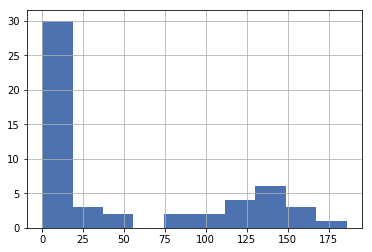

In [24]:
goal_df.total_points.hist()

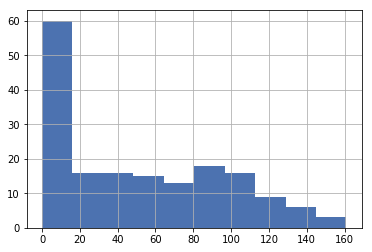

In [25]:
def_df.total_points.hist()

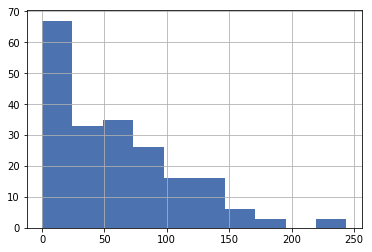

In [26]:
mid_df.total_points.hist()

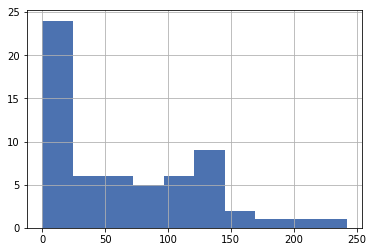

In [27]:
fwd_df.total_points.hist()

In [28]:
# TOTAL POINTS

In [29]:
mid_df.sort_values('total_points',ascending=False).head(30)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
297,Borges Fernandes,Man Utd,3,40.8,120,3101,0,20.3,244,Midfielder,20.3
253,Salah,Liverpool,3,48.6,125,3077,0,18.5,231,Midfielder,18.5
390,Son,Spurs,3,17.0,100,3119,0,22.8,228,Midfielder,22.8
250,Mané,Liverpool,3,3.4,120,2808,0,14.7,176,Midfielder,14.7
301,Rashford,Man Utd,3,1.2,95,2917,0,18.3,174,Midfielder,18.3
226,Dallas,Leeds,3,17.3,55,3410,0,31.1,171,Midfielder,31.1
238,Harrison,Leeds,3,5.6,60,2846,0,26.7,160,Midfielder,26.7
270,Gündogan,Man City,3,5.4,75,2025,0,20.9,157,Midfielder,20.9
370,Ward-Prowse,Southampton,3,8.2,65,3420,0,24.0,156,Midfielder,24.0
275,Sterling,Man City,3,3.2,110,2534,0,14.0,154,Midfielder,14.0
